# YIELD MODEL INVERSION

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
import ee
import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline

In [9]:
ndvi = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/ndviTS_17year.tif')
evi = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/eviTS_17year.tif')
pcp = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/pcpTS.tif')
lstday = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/LST_Day_1kmTS.tif')
lstnight = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/LST_Night_1kmTS.tif')
et = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/etTS.tif')
pet = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/petTS.tif')
slp = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/ch3_slope.tif')
ele = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/parameters/ch3_elevation.tif')


# rAINFED

RMSE = 2.3483678709546285 MAE = 2.1276330247291697 MAPE = 0.6776927721891804


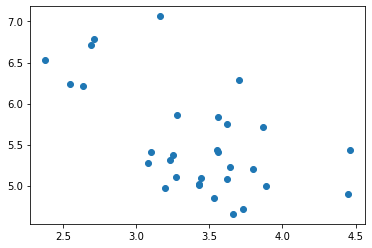

In [21]:
# FORMULA
#yieldFinal = -46.6422 + 15.4367*evi + 0.0194*pcp + 1.8418*lstnight -0.1254*et + 0.0329*pet + 0.0068*ele
yieldFinal = -74.446220 + 23.546708*evi + 0.028446*pcp + 0.356150*lstday +  2.352753*lstnight -0.149883*et + 0.044270*pet + 0.009653*ele


#yieldFinal = yieldFinal.rio.reproject("EPSG:32651")
#yieldFinal.rio.crs

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg')

#fig, ax = plt.subplots(figsize=(12,12))
#gdf.plot(ax=ax, color = 'orangered')
#yieldFinal.plot(ax=ax)

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', "yieldFinal.tif", stats='mean',geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)

grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')

from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

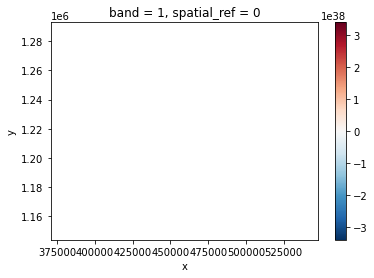

In [24]:
#yieldFinal.plot()
rfMask = rxr.open_rasterio('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/final_DS_RF.tif')
rfMask.plot()

# IRRIGATED

In [12]:
# FORMULA
#yieldFinal = -46.6422 + 15.4367*evi + 0.0194*pcp + 1.8418*lstnight -0.1254*et + 0.0329*pet + 0.0068*ele
yieldFinal = -74.446220 + 23.546708*evi + 0.028446*pcp + 0.356150*lstday +  2.352753*lstnight -0.149883*et + 0.044270*pet + 0.009653*ele
yieldFinal.plot()


yieldFinal = yieldFinal.rio.reproject("EPSG:32651")
yieldFinal.rio.crs

gdf = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg')

#fig, ax = plt.subplots(figsize=(12,12))
#gdf.plot(ax=ax, color = 'orangered')
#yieldFinal.plot(ax=ax)

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', "yieldFinal.tif", stats='mean',geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)

grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Irrigated Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='irri']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')

from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

AttributeError: 'DataArray' object has no attribute 'imshow'